# Assignment 6: Predicting affairs in marriages

*Due: 4/16*

**Work through the following code and complete the instructions are at the end**

## Step 1: Load and explore the data

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

%matplotlib inline

In [3]:
# Load the affairs dataset from statsmodels. You can find details on the dataset here:
# http://statsmodels.sourceforge.net/0.5.0/datasets/generated/fair.html
dta = sm.datasets.fair.load_pandas().data

# Let's "affair" column: 1 represents a marriage with an affairs, 0 represents no affair
dta['affair'] = (dta.affairs > 0).astype(int)

# Always preview the data to make sure the structure of the data frame is as you expect..
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3,32,9.0,3,3,17,2,5,0.111111,1
1,3,27,13.0,3,1,14,3,4,3.230769,1
2,4,22,2.5,0,1,16,3,5,1.400000,1
3,4,37,16.5,4,3,16,5,5,0.727273,1
4,5,27,9.0,1,1,14,3,4,4.666666,1


In [4]:
# We have a lot of discrete and categorical variables, which makes plotting less reliable. Try 
#  displaying a `scatter_matrix` to see for yourself.

#  Let's take a look at the summary statistics:

dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


In [5]:
dta.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [6]:
dta.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


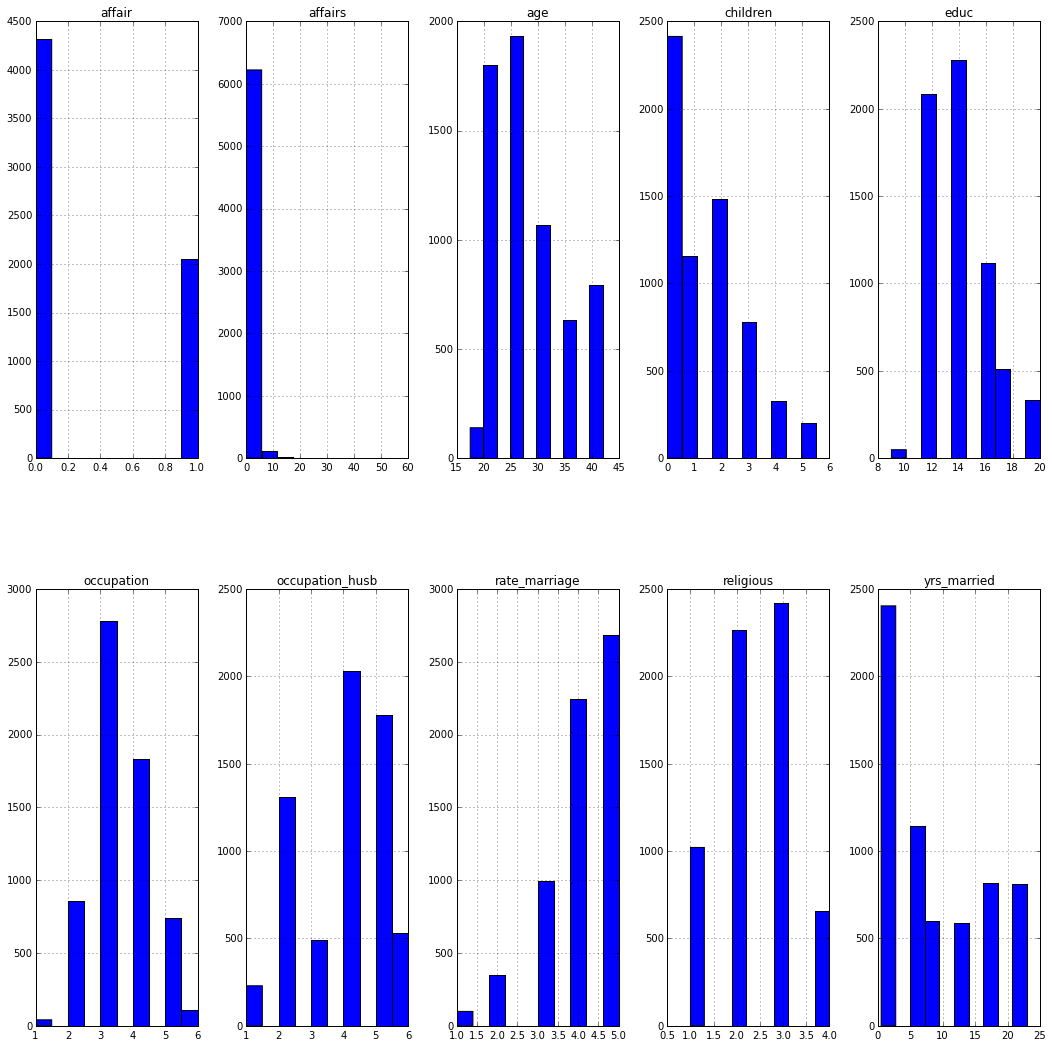

In [7]:
# Due to the quantization of our data, the distributions offer better insight than the scatter plots.
dta.hist(layout=(2, 5), figsize=(18, 18));

affair,False,True
rate_marriage,,
1,25,74
2,127,221
3,446,547
4,1518,724
5,2197,487


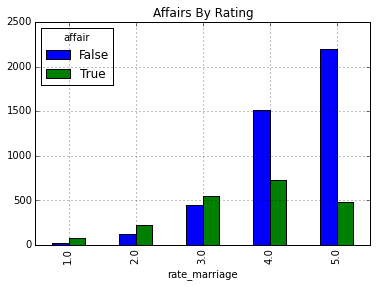

In [8]:
# crosstab is a very powerful function. Play around with it to see what it does 
#   you should know it well!
affairs_by_marriage_rating = pd.crosstab(dta.rate_marriage, dta.affair.astype(bool))

affairs_by_marriage_rating.plot(kind='bar', title='Affairs By Rating');

affairs_by_marriage_rating

affair,False,True
rate_marriage,,
1,0.252525,0.747475
2,0.364943,0.635057
3,0.449144,0.550856
4,0.677074,0.322926
5,0.818554,0.181446


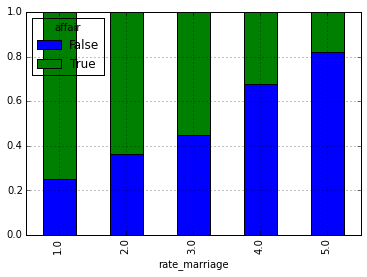

In [9]:
# Explore the following line of code and explain what it does in your own words
percent_cheating = affairs_by_marriage_rating.div(affairs_by_marriage_rating.sum(1), axis=0)

percent_cheating.plot(kind='bar', stacked=True);

#### A: dataframe.div divides a dataframe into a supplied denominator, along an axis. 
The stacked bar plot stacks the true and false percentage columns on top of eachother for each observation. 


## Step 2: Training and validating the model

In [10]:
# Training the model:

X = dta.drop(['affairs', 'affair'], axis=1)

y = dta['affair']

# Use 33% of our dataset for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

model = LogisticRegression()
model = model.fit(X_train, y_train)

In [11]:
# Evaluating the model:
# Which of these is lower and why?

print "Score on training data: ", model.score(X_train, y_train)
print "Score on test data: ", model.score(X_test, y_test)

Score on training data:  0.727315357562
Score on test data:  0.713945740124


# Assignment:

## Part I: Analyzing the model

From the results of the above model, calculate the following:

- **# of True positives:** Marriages with affairs which were properly classified as having an affair
- **# of True negatives:** Marriages without affairs which were properly classified as not having an affair
- **# of False positives:** Predicting an affair when there was none
- **# of False negatives:** Not Predicting an affair when there was an affair

*Hint:* You should use the **`model.predict`** function to calculate these.

Based on the above compute the following:
- Confusion matrix
- Precision
- Accuracy
- F1 score

State in your own words which each of these mean and the significance of each.

In [53]:
# model.predict affairs list. if y = true and x = true, z = true positive, etc. 
predictions = model.predict(X_test)
results = zip(predictions, y_test)
true_positives = float(0)
true_negatives = float(0) 
false_positives = float(0)
false_negatives = float(0)
for i in results: 
    if i[0] == i[1]:
        if i[1] == 1: 
            true_positives += 1
        else:
            true_negatives += 1
    else: 
        if i[1] == 1:
            false_negatives += 1
        else: 
            false_positives += 1

print true_positives,true_negatives,false_positives,false_negatives


215.0 1285.0 134.0 467.0


In [54]:
confusion_matrix = pd.crosstab(predictions, y_test)
confusion_matrix.columns = ('x true', 'x false')
confusion_matrix.index = ('y true', 'y false')
confusion_matrix

,x true,x false
y true,1285,467
y false,134,215


In [87]:
import sklearn.metrics as metrics
accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)
precision = true_positives / (true_positives + false_positives)
recall = (true_positives / (true_positives + false_negatives))
f1_score = 2.0 * ((precision * recall)/(precision + recall))

print 'Accuracy: %s' % accuracy
print 'Precision: %s' % precision
print 'Recall: %s' % recall
# print 'skl f1score %s' % metrics.f1_score(y_test,predictions) 
print 'f1_score: %s' % f1_score

Accuracy: 0.713945740124
Precision: 0.616045845272
Recall: 0.315249266862
f1_score: 0.417070805044


### State in your own words which each of these mean and the significance of each.
#### Accuracy:
    percentage of correct predictions out of all predictions. Broad measure of performance
#### Precision:
    how repeatable your results were
#### F1 Score:
    a weighted average of these two

## Part II: Improving the model

Our model achieved a score of roughly 71.3% accuracy on the test dataset. This may not seem too bad, but our average affair rate is about 32%, so a model that always predicted "no" would have an accuracy of `100*(1 - y.mean())` or about 68 percent. So we're not much better off than the null error rate.

Your job is to improve the accuracy model without overfitting the data. To prevent overfitting, be sure to split your data so 70% of the dataset is used for testing and 30% of the dataset is used for training (so you should have 1909 samples in the testing dataset and 4457 samples in the training dataset). You should be able to achieve higher than 72.6% accuracy on the **test** dataset. **Be sure to calculate both the training and test error and strive for the highest accuracy possible.**

**Consider applying the following techniques:**
- Removing features
- Regularization techniques (Look at the 'C' attribute in the `LogisticRegression` function)
- Using a non-linear model

<Container object of 8 artists>

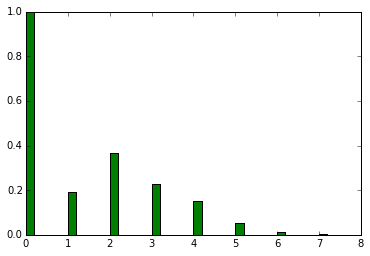

In [61]:
# Feature selection: 
from sklearn.feature_selection import SelectPercentile, f_classif

plt.figure(1)
plt.clf()

X_indices = np.arange(X.shape[-1])
selector = SelectPercentile(f_classif, percentile=10)
selector.fit(X, y)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(X_indices, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='g')

In [88]:
# Your code here!
# features 0 (rate marriage) and 2 (years married) look decent. Let's use those. 
# Training the model:


from sklearn.preprocessing import PolynomialFeatures
for n in range(1,20):
    poly_features = PolynomialFeatures(degree=n)

    X1 = dta[['rate_marriage', 'age', 'yrs_married']]

    X1 = poly_features.fit_transform(X1)

    y1 = dta['affair']

    # Use 33% of our dataset for testing
    X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=123)

    model = LogisticRegression(C=0.7)
    model = model.fit(X1_train, y1_train)

    print "Score on training data with {0} degree, : {1}".format(n,model.score(X1_train, y1_train))
    print "Score on test data with {0} degree : {1}".format(n, model.score(X1_test, y1_test))

Score on training data with 1 degree, : 0.722626025791
Score on test data with 1 degree : 0.71442170395
Score on training data with 2 degree, : 0.730832356389
Score on test data with 2 degree : 0.722989052832
Score on training data with 3 degree, : 0.72919109027
Score on test data with 3 degree : 0.716801523084
Score on training data with 4 degree, : 0.728722157093
Score on test data with 4 degree : 0.715373631604
Score on training data with 5 degree, : 0.722626025791
Score on test data with 5 degree : 0.715373631604
Score on training data with 6 degree, : 0.72286049238
Score on test data with 6 degree : 0.714897667777
Score on training data with 7 degree, : 0.721688159437
Score on test data with 7 degree : 0.717277486911
Score on training data with 8 degree, : 0.723329425557
Score on test data with 8 degree : 0.715373631604
Score on training data with 9 degree, : 0.710668229777
Score on test data with 9 degree : 0.705854355069
Score on training data with 10 degree, : 0.712309495897
Sc

In [89]:
from sklearn.linear_model import LinearRegression

X2 = dta.rate_marriage
y2 = dta.affair
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.33, random_state=123)

linearmodel = LinearRegression()

linearmodel.fit(X3_train, y3_train)

linearmodel.score(X3_test, y3_test)


0.11253909521020822

In [13]:
# X3 = dta.drop(['affairs', 'affair'], axis=1)

# y3 = dta[['affair']]

# from sklearn.preprocessing import PolynomialFeatures
# poly_features = PolynomialFeatures(degree=3)
# X3 = poly_features.fit_transform(X3)

# # Use 33% of our dataset for testing
# X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.33, random_state=123)

# from sklearn import linear_model
# linear_regressor3 = linear_model.LinearRegression()


# linear_regressor3.fit(X3_train, y3_train)

# print "X3_train.shape", X3_train.shape
# print "X3_train.shape", X3_test.shape

# print "y3_train.shape", y3_train.shape
# print "y3_test.shape", y3_test.shape

# print "linear_regressor3.predict(X3_train).shape", linear_regressor3.predict(X3_train).shape
# print "linear_regressor3.predict(X3_test).shape", linear_regressor3.predict(X3_test).shape

# print "Training Set R-Squared"
# print linear_regressor3.score(X3_train, y3_train)
# print "Testing Set R-Squared"
# print linear_regressor3.score(X3_test, y3_test)

X3_train.shape (4265, 165)
X3_train.shape (2101, 165)
y3_train.shape (4265, 1)
y3_test.shape (2101, 1)
linear_regressor3.predict(X3_train).shape (4265, 1)
linear_regressor3.predict(X3_test).shape (2101, 1)
Training Set R-Squared
0.215013956668
Testing Set R-Squared
0.11253909521


In [14]:
X3 = dta.drop(['affairs', 'affair'], axis=1)

y3 = dta[['affair']]

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3)
X3 = poly_features.fit_transform(X3)

# Use 33% of our dataset for testing
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.33, random_state=123)

from sklearn import linear_model
linear_regressor3 = linear_model.LinearRegression()

linear_regressor3.fit(X3_train, y3_train)

print "Training Set R-Squared"
print linear_regressor3.score(X3_train, y3_train)
print "Testing Set R-Squared"
print linear_regressor3.score(X3_test, y3_test)

# evcinnyc [6:03 PM]
# ERROR OUTPUT: shapes (4265,165) and (8,) not aligned: 165 (dim 1) != 8 (dim 0)

Training Set R-Squared
0.215013956668
Testing Set R-Squared
0.11253909521
